<a href="https://colab.research.google.com/github/samyamaryal/Computer-Vision/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
displayindex = 10

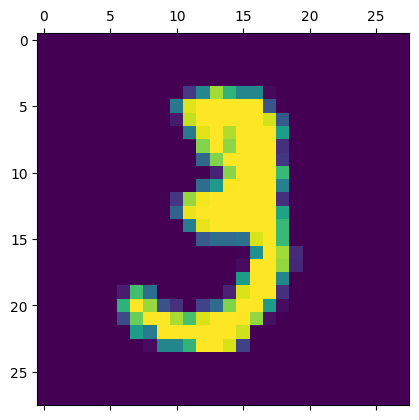

In [6]:
plt.matshow(X_train[displayindex])

In [7]:
print(y_train[displayindex])

3


In [8]:
X_train[displayindex].shape

(28, 28)

# We need to flatten the shape of training and testing datasets into 1-D array. We do that using the .reshape() method from numpy.

In [9]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [10]:
print(X_train.shape, '\n', X_train_flattened.shape)

(60000, 28, 28) 
 (60000, 784)


In [11]:
model = keras.Sequential([
    keras.layers.Dense(20, input_shape = (X_train_flattened.shape[1],), activation = 'sigmoid'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

In [13]:
EPOCHS = 10

In [14]:
model.fit(X_train_flattened, y_train, epochs = EPOCHS)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9935 - accuracy: 0.7387
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5196 - accuracy: 0.8475
Epoch 3/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.4554 - accuracy: 0.8647
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4429 - accuracy: 0.8692
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4209 - accuracy: 0.8742
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4018 - accuracy: 0.8789
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4261 - accuracy: 0.8698
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3898 - accuracy: 0.8829
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3712 - accuracy: 0.8888
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3

In [15]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3396 - accuracy: 0.9021


[0.33958637714385986, 0.9021000266075134]

#Let's see the difference when the input is scaled between 0 and 1. This is done by dividing the entire array by maximum value of X_train and X_test.

In [16]:
X_train_flattened_reshaped = X_train_flattened / 255.0
X_test_flattened_reshaped = X_test_flattened / 255.0

In [17]:
model = keras.Sequential([
    keras.layers.Dense(20, input_shape = (X_train_flattened.shape[1],), activation = 'sigmoid'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

model.fit(X_train_flattened_reshaped, y_train, epochs = EPOCHS)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7079 - accuracy: 0.8419
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2964 - accuracy: 0.9189
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2426 - accuracy: 0.9315
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2149 - accuracy: 0.9378
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1964 - accuracy: 0.9438
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1834 - accuracy: 0.9471
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1724 - accuracy: 0.9500
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1634 - accuracy: 0.9530
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1560 - accuracy: 0.9549
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.149

In [18]:
model.evaluate(X_test_flattened_reshaped, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1765 - accuracy: 0.9480


[0.1764511615037918, 0.9480000138282776]

# We can see a significant increase in accuracy when the data is reshaped.

# Let's see the difference when we use the softmax activation function.

In [19]:
model = keras.Sequential([
    keras.layers.Dense(20, input_shape = (X_train_flattened.shape[1],), activation = 'softmax'),
    keras.layers.Dense(10, activation = 'softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

model.fit(X_train_flattened_reshaped, y_train, epochs = EPOCHS)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.2805 - accuracy: 0.7218
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6616 - accuracy: 0.7864
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5414 - accuracy: 0.7958
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3925 - accuracy: 0.9046
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2930 - accuracy: 0.9283
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2602 - accuracy: 0.9347
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2439 - accuracy: 0.9381
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2309 - accuracy: 0.9405
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2209 - accuracy: 0.9427
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.214

In [20]:
model.evaluate(X_test_flattened_reshaped, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2369 - accuracy: 0.9362


[0.2368721216917038, 0.9362000226974487]

In [21]:
# Constructing confusion matrix for the most recent model

In [23]:
predicted_data = model.predict(X_train_flattened_reshaped)
actual_data = y_train

1875/1875 [==============================] - 4s 2ms/step


In [25]:
'''
from sklearn.metrics import confusion_matrix as CM
confusionmatrix = CM(actual_data, predicted_data)
'''

'\nfrom sklearn.metrics import confusion_matrix as CM\nconfusionmatrix = CM(actual_data, predicted_data)\n'